# Lab Week 6

## EOSC 211

### Learning Objectives:

1. develop algorithms involving loops.
2. carry out a top-down design process.
3. modularize code, separating the algorithm from input/output statements.
4. solve a problem useful in the earth sciences

### Themes

loops

top down design

testing code/writing code that passes tests -- how to do without functions??

doing the math -- running mean/median equations


### Intro

In the very first lab you plotted a long sequence (a TIME SERIES) of temperatures at Sand Heads.  Remember that the data showed a broad seasonal trend (colder in winter, warmer in summer), but that at veryshort time scales (a day or two) there was a great deal of variability which gave the curve a fuzzy lookwhen you plotted a whole year.  It is often very useful to be able to “SMOOTH” a time series to betterdisplay broad trends by averaging away the short-time variability. A very simple way of smoothing a time series is to use a so-called RUNNING MEAN. Imagine thatNdata points are recorded hourly, and number them 1,2,3,. . .,i−1, i, i+ 1,. . .,Nas they appear in a vector.If we are calculating a 5 point running mean, then the 5th point in the SMOOTHED time series will bethe average of points 3, 4, 5, 6 and 7 from the original time series (from “two-to-the-left” to “two-to-the-right”).  The 6th point in the smoothed time series will be the average of points 4, 5, 6, 7,and 8 from theoriginal time series. The 7th point will be the average of points 5, 6, 7, 8, and 9. And so on, moving overone point each time, with your window RUNNING through the time series, calculating the average of thepoints in the window at each point in the original series (Fig. 2).

<img src="runningmean.png" width="300">
<p style="text-align: center;">Fig 2: An example of the 5 point running mean. The $i$th element of $z$ will be 9.2, an average of 1, 12, 21, 7, and 5. The next element will be 9.4, an average of 12, 21, 7, 5, and 2, and so on.</p>


How de we describe this mathematically? Formally, we start with a time series vector $x$, whose $i$th element is $x_i$ where $i= 1. . . N$.  Then we form a new time series $z$, again with $N$ elements, for which the $$ith point $z_i$ is an average of points in $x$ within the window. If the window has a length of 5, then:

$$
z_i = \frac{x_{i-2} + x_{i-1} + x_{i} + x_{i+1} + x_{i+2}}{5}\tag{1}
$$

$$
z_i = \frac{1}{5}\sum_{k=-2}^2 x_{i+k}\tag{2}
$$

and if it has a length $L$(which has to be an odd number) then it would be:

$$
z_i = \frac{1}{L}\sum_{k=-W}^Wx_{i+k}\tag{3}
$$
where
$$
W = \frac{L-1}{2}\tag{4}
$$

In MATLAB you can write x(i)and z(i) as code elements corresponding to xi and zi,x for x, etc.,because MATLAB was designed to translate math into code! Now, we don’t just program the long sum of 5 points in eqn. (1), because we may want to change the length of the window - we want L as another input parameter. This is because we might want a 3 point running mean, or a 9 point running mean. Instead, in this lab, you will use loops to program eqn. (3). To write the required code, we will break the problem down into a series of steps, which you will follow as you go through the lab:

•First, develop a basic algorithm, looping through all the points in a time series of arbitrary length setting xi=`<something>`.

•Then, develop the code that computes the running mean inside that basic loop, so that xi=`<runningmean centered at pointi >`.

•Next, add some if-statements to handle the awkward cases that take place at the start and end of theloop.

•Finally, copy/modify that code to handle a closely related (but different) task (the running median).

Hint:  it is good practice to write the code so that algorithm inputs and outputs are clearly defined using specific variable names.

(b)  Within runmean, first write an OUTER loop in which the index (call iti) goes from 1 tolength(x). This outer loop is meant to process every point in the time series.(c)  Now add an INNER LOOP (with indexk) that implements the running mean itself. Note thatMATLAB has built-inmean()andsum()functions, but DO NOT use them here.  You willrun into problems running your code. Why? Considertemporarilychanging the OUTER looplimits to something that prevents these problems while debugging the code (but change it backfor the next step).(d)  Now add code to handle the END EFFECTS - those places at the beginning and the end ofthe dataset where we don’t have(winlen-1)/2points to the left (or right) of theith point -perhaps usingifstatements to perform the running mean differently.  Think of two differentways of handling these effects, and implement the simplest (yes - think of two, but implementone).  Describe in a comment how your TWO different solutions would work, and why youchose the one you chose.(e)  In order to make really sure you have implemented the algorithm correctly, test it on somedata for which you can work out the answer. For example, setx=[1 5 3 7 9 8 4 6];winlen=3;Work out BY HAND what the answer should be, and then see if your program replicates this.(f)  You can also test this on a real example, like the Sand Heads air temperature data from the labin week 2 (calledlab1.mat).  You may need to zoom in on the plot to see the two series.If  this  is  working  properly  the  red  line  will  be  much  smoother  than  the  blue  line  as  daily variations are removed. Try different window lengths.

In [9]:
# andrew's soln
from e211_lib import e211
import numpy as np
from matplotlib import pyplot as plt

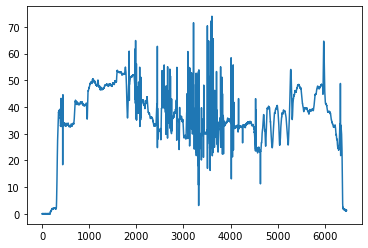

In [10]:
# load data
vel = e211.load_aircraft("aircraft_gps.mat")
# quick visualization
plt.plot(vel)

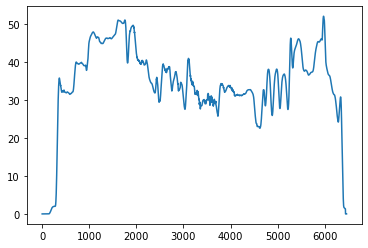

In [25]:
### do the running mean ###

winlen = 50  # L from equation 3
window_ind = int((winlen - 1) / 2)  # equation 4

# discuss this vs the np.append() approach
z = np.zeros_like(vel)

# outer loop skips beginning and end points (they are taken to 0)
# we could do the sum over fewer points, but its more complicated and this dataset is huge/high res
for i in range(window_ind, len(vel) - window_ind): 
    for k in range(i - window_ind, i + window_ind):
        z[i] += vel[k] / winlen  # eqn 2

plt.plot(z)

2.  Now write an algorithm to determine the running MEDIAN over a window lengthwinlen_med(use the built-in functionmedianto replace the running mean loop). Be careful and explicitly label(with comments) what the inputs and outputs for the running median code should be.  The outputvariable for the running median code should be namedzm. Add this code torunmeanso there aretwo outputs for the whole script:zandzm.Why would you use a running median?  In the case of the temperature data most (or all) of thedata is correct, or at least not wildly and obviously wrong. This is generally untypical of real data,which often show very intermittent “obviously erroneous” measurements for various reasons.  Forexample, the figure on page 1 shows a speed derived from GPS positions measured on a float-planeflying a survey over the Strait of Georgia (this data can be found in the variablegps.velcontainedin the structuregpswhich is stored in the datafileaircraft_gps.mat). Note that the speed tendsto vary smoothly between 30 and 50 m/s, but there are strange spikes in the series (especially inthe middle part of the time series when the plane is turning a lot), related to changes in the pathsof radio-wave propagation when the aircraft changes its orientation and certain parts of the sky areobscured. These are clearly “bad data” because the speed of anything real won’t change by 20 m/sfor only one second!Now,  if  we  were  interested  in  the  speed,  taking  a  running  average  will  not  really  help  matters(go ahead - use your code above to see) because it will tend to pull the smooth curve away fromthe  “correct”  points.   But  a  running  median,  if  the  window  is  long  enough,  can  REJECT  theseOUTLIERS.Test your algorithm withgps.velusingwinlen_med=7. When working properly the spikes willbe removed from the time series.